In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
data = pd.read_csv("Phishing_Email.csv")
data = data.dropna(subset=['Email Text'])
data.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


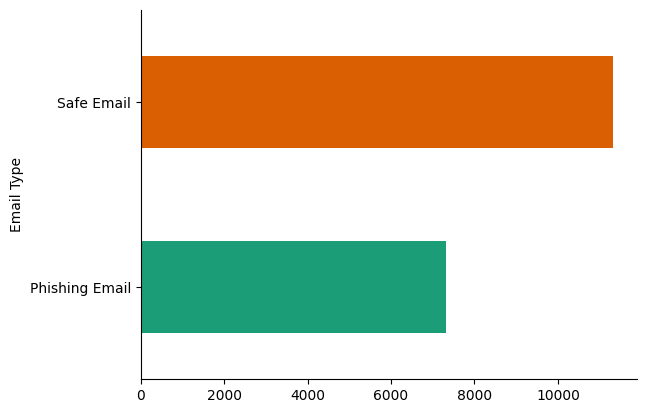

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Email Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

# Preprocessing function for emails
def preprocess_email(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Optionally: Remove stopwords and perform lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Apply preprocessing to the email texts
data['Email Text'] = data['Email Text'].apply(preprocess_email)

In [21]:
# Feature extraction and model training
X = data['Email Text']
y = data['Email Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Using TF-IDF with unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

In [24]:
NB = make_pipeline(tfidf_vectorizer, MultinomialNB())

# Train the model
NB.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])

In [26]:
# Evaluate the model
y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.902334317145157
Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.97      0.78      0.87      1518
    Safe Email       0.87      0.98      0.92      2209

      accuracy                           0.90      3727
     macro avg       0.92      0.88      0.90      3727
  weighted avg       0.91      0.90      0.90      3727

